In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
#한글깨짐방지
# import matplotlib.pyplot as plt
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] =False

plt.rc('font', family='NanumBarunGothic')

In [ ]:
path = '/content/drive/MyDrive/mulcam_bigdata/2024통계데이터공모전/기획_데이터수집/성원님/temp/시군구코드별_변수_v3.csv'
data_v3 = pd.read_csv(path)

In [ ]:
data_v3[:5]

,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
0,31050,경기도,부천시,53.45,2227,791,1203,8.0,0.0,1.0
1,31240,경기도,화성시,698.18,2319,991,1450,10.0,0.0,2.0
2,31023,경기도,분당구,69.49,2093,580,969,5.0,1.0,0.0
3,31130,경기도,남양주시,458.14,1816,646,827,5.0,0.0,1.0
4,11230,서울특별시,강남구,39.50,1634,369,576,7.0,0.0,2.0


In [ ]:
data_v3['2차병원수'].sum()

663.0

In [ ]:
data_v3['3차병원수'].sum()

10.0

In [ ]:
data_v3.행정구역시도명.value_counts()

행정구역시도명
경기도        42
서울특별시      25
경상북도       24
경상남도       22
전라남도       22
강원도        18
부산광역시      16
충청남도       16
전라북도       15
충청북도       14
인천광역시      10
대구광역시       8
광주광역시       5
대전광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [ ]:
temp = pd.DataFrame(data_v3.groupby('행정구역시도명')['소아청소년수'].sum())

In [ ]:
temp['비율'] = temp['소아청소년수'] / temp['소아청소년수'].sum()
temp['비율별병원수'] = temp['비율'] * 45
temp

,소아청소년수,비율,비율별병원수
행정구역시도명,,,
강원도,5113,0.034151,1.536799
경기도,39612,0.264579,11.906063
경상남도,10865,0.072570,3.265661
경상북도,8050,0.053768,2.419565
광주광역시,4469,0.029850,1.343234
대구광역시,6691,0.044691,2.011094
대전광역시,4004,0.026744,1.203471
부산광역시,9352,0.062465,2.810903
서울특별시,21147,0.141246,6.356092


# 군집화 시도(돌리지 말것)

In [ ]:
# 사용 데이터
data = data_v3[['소아청소년수', '출생아수', '가임연령부부수','2차병원수', '3차병원수', '달빛병원수']]
data

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
0,2227,791,1203,8.0,0.0,1.0
1,2319,991,1450,10.0,0.0,2.0
2,2093,580,969,5.0,1.0,0.0
3,1816,646,827,5.0,0.0,1.0
4,1634,369,576,7.0,0.0,2.0
...,...,...,...,...,...,...
245,99,42,53,0.0,0.0,0.0
246,94,39,46,1.0,0.0,0.0
247,78,24,24,0.0,0.0,0.0
248,69,21,25,0.0,0.0,0.0


In [ ]:
# 상관 분석
correlation_matrix = data.corr()
correlation_matrix

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
소아청소년수,1.000000,0.967409,0.968888,0.538956,0.243675,0.514918
출생아수,0.967409,1.000000,0.978221,0.539129,0.213261,0.535982
가임연령부부수,0.968888,0.978221,1.000000,0.515786,0.230110,0.510597
2차병원수,0.538956,0.539129,0.515786,1.000000,0.182488,0.388964
3차병원수,0.243675,0.213261,0.230110,0.182488,1.000000,0.012332
달빛병원수,0.514918,0.535982,0.510597,0.388964,0.012332,1.000000


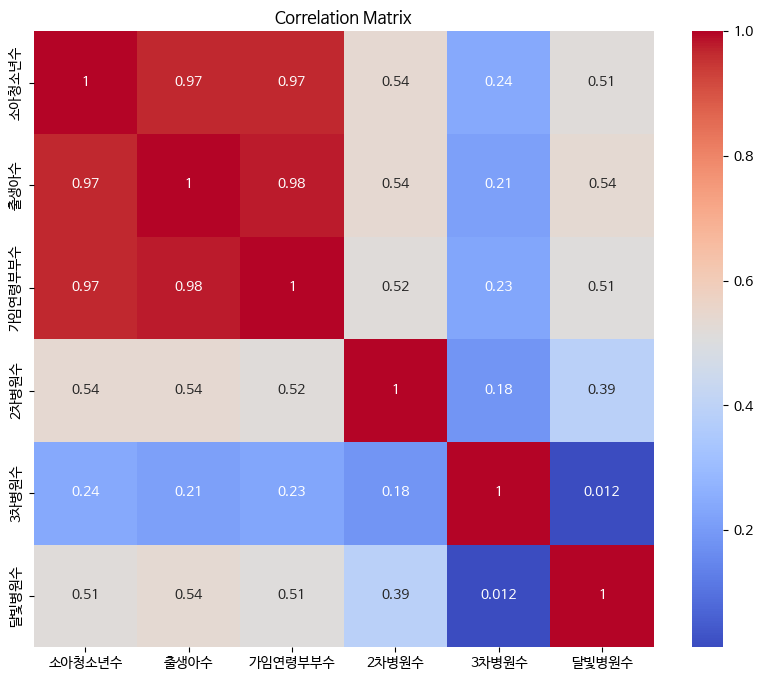

In [ ]:
# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5
0,3.844657,3.680025,3.853092,1.386642,-0.204124,0.966595
1,4.061905,4.966773,4.912024,1.905207,-0.204124,2.476901
2,3.528230,2.322504,2.849892,0.608795,4.898979,-0.543710
3,2.874125,2.747132,2.241113,0.608795,-0.204124,0.966595
4,2.444352,0.964984,1.165032,1.127360,-0.204124,2.476901
...,...,...,...,...,...,...
245,-1.180384,-1.138850,-1.077162,-0.687617,-0.204124,-0.543710
246,-1.192191,-1.158151,-1.107172,-0.428335,-0.204124,-0.543710
247,-1.229973,-1.254657,-1.201490,-0.687617,-0.204124,-0.543710
248,-1.251226,-1.273959,-1.197203,-0.687617,-0.204124,-0.543710


In [ ]:
# 주성분 분석 (PCA) 수행
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [ ]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5
0,6.442376,-0.649639,-1.780622,0.976323,0.103192,0.091223
1,8.405569,-1.270438,-1.515142,0.300016,-0.670180,-0.002031
2,5.096998,4.664729,-1.516301,-0.193102,0.712275,0.218404
3,4.421852,-0.633549,-1.372807,0.281128,0.321243,-0.394379
4,3.468987,-1.147274,0.540061,-0.846029,1.156700,0.124497
...,...,...,...,...,...,...
245,-2.143774,0.043339,0.181803,-0.155836,-0.059451,0.046361
246,-2.083934,0.050017,0.398308,-0.021301,-0.053357,0.044580
247,-2.288070,0.047502,0.264187,-0.178375,-0.003386,0.039221
248,-2.306174,0.047963,0.273712,-0.181292,-0.013794,0.056744


In [ ]:
# 주성분 분석 결과 확인
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(high_corr_var))])
explained_variance = pca.explained_variance_ratio_

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,1065.180858,18.232432,-2.051716,-0.551986,-0.236026
1,1381.519613,-12.471714,-2.931350,-0.028814,-0.239164
2,753.617768,65.297896,-1.883747,-1.056792,0.763847
3,671.525421,-68.035034,-3.856158,-0.331630,-0.107955
4,309.436687,24.605898,2.608097,1.286025,-0.050486
...,...,...,...,...,...
245,-307.218733,9.196119,-0.241398,0.057507,0.008198
246,-314.705416,7.820327,0.786390,0.037429,0.003660
247,-341.336183,8.223714,-0.011461,0.090458,0.014585
248,-342.155528,11.277287,0.053830,0.100722,0.013307


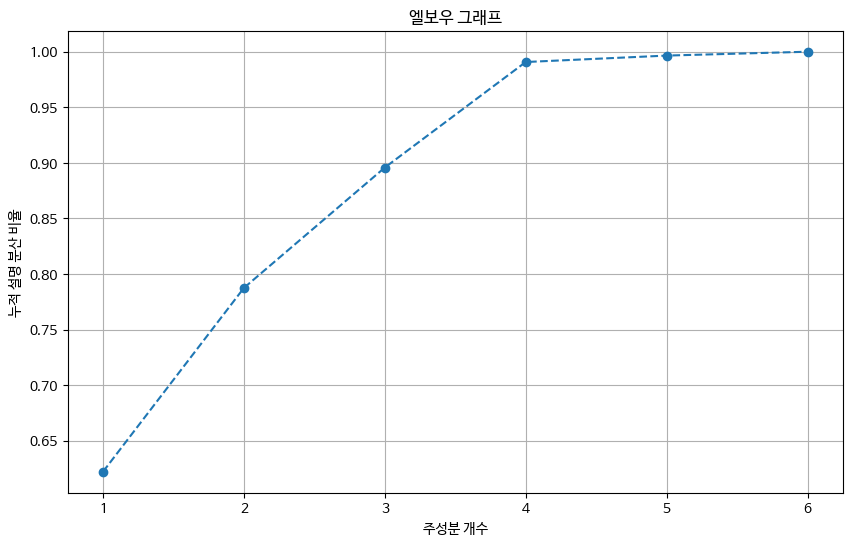

In [ ]:
# 주성분 별 설명 분산 비율
explained_variance = pca.explained_variance_ratio_

# 누적 설명 분산 비율 계산
cumulative_explained_variance = np.cumsum(explained_variance)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('엘보우 그래프')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산 비율')
plt.grid()
plt.show()


In [ ]:
# 주성분 개수별 전체 데이터 설명 % 구하는 함수
def result_percent(n):
    result_percent = 0

    for i in range(n):
        result_percent = result_percent + explained_variance[i]

    return result_percent

result_percent(3)

0.8958144518273136

In [ ]:
# 주성분 로딩값 출력
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=data.columns)

print("주성분 로딩값:")
loadings

# 로딩값은 각 주성분에 대해 원래 변수들의 기여도

주성분 로딩값:


,PC1,PC2,PC3,PC4,PC5,PC6
소아청소년수,0.497979,0.005947,-0.268441,0.084669,0.818545,-0.052312
출생아수,0.499920,-0.031820,-0.266215,0.075102,-0.443082,-0.690097
가임연령부부수,0.496320,-0.006215,-0.307593,0.077557,-0.364715,0.721098
2차병원수,0.348128,0.022936,0.767372,0.537300,-0.014417,0.022838
3차병원수,0.149945,0.920655,0.137259,-0.332549,-0.019180,-0.010654
달빛병원수,0.334793,-0.388305,0.393390,-0.762821,0.008357,0.020297


In [ ]:
# 결과 해석
# 주성분 4개까지 고려시 전체 데이터의 99%를 설명할 수 있음
# 주성분 3개까지 고려시 전체 데이터의 89%를 설명할 수 있음

# pc1의 경우 소아청소년수, 출생아수, 가임연령부부수가 각각 0.497979, 0.499920, 0.496320 으로 가장 많은 영향을 주는 것을 알 수 있음
# PC2의 경우 3차병원수가 0.920655으로 가장 많은 영향을 주는 것을 알 수 있음
# PC3의 경우 2차병원수가 0.767372으로 가장 많은 영향을 주는 것을 알 수 있음
# PC4의 경우 2차병원수가 0.537300으로 가장 많은 영향을 주는 것을 알 수 있음
# >> PC1은 인구수와 관련된 주성분 PC2,3,4는 병원수와 관련된 주성분

In [ ]:
# 주성분 3개까지만 사용
col = ['PC1', 'PC2', 'PC3']
pca_df = pca_df[col]
pca_df

,PC1,PC2,PC3
0,1065.180858,18.232432,-2.051716
1,1381.519613,-12.471714,-2.931350
2,753.617768,65.297896,-1.883747
3,671.525421,-68.035034,-3.856158
4,309.436687,24.605898,2.608097
...,...,...,...
245,-307.218733,9.196119,-0.241398
246,-314.705416,7.820327,0.786390
247,-341.336183,8.223714,-0.011461
248,-342.155528,11.277287,0.053830


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

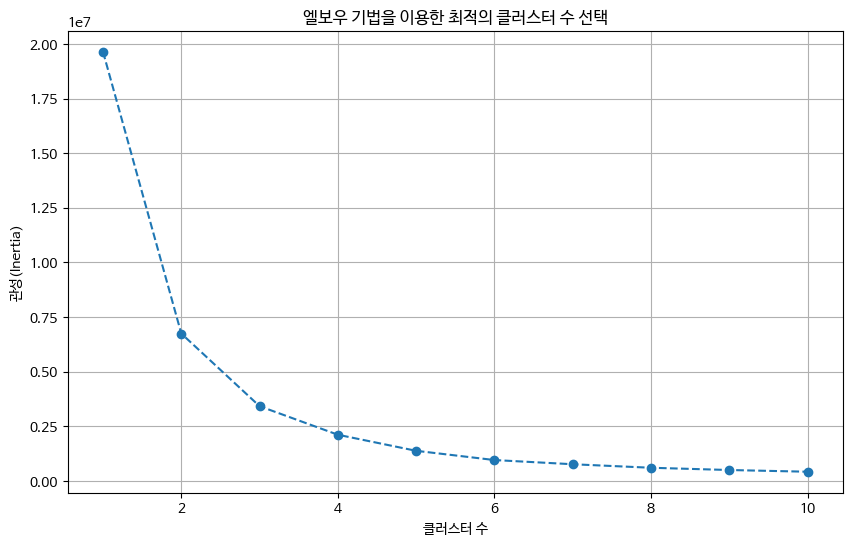

In [ ]:
from sklearn.cluster import KMeans

# 최적의 클러스터 수 찾기 (엘보우 기법)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('엘보우 기법을 이용한 최적의 클러스터 수 선택')
plt.xlabel('클러스터 수')
plt.ylabel('관성(Inertia)')
plt.grid()
plt.show()

In [ ]:
# 클러스터 수 선택 (3개로 선택)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)
pca_df['KMeans_Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-120-a493abecf4c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['KMeans_Cluster'] = clusters


In [ ]:
pca_df

,PC1,PC2,PC3,KMeans_Cluster
0,1065.180858,18.232432,-2.051716,2
1,1381.519613,-12.471714,-2.931350,2
2,753.617768,65.297896,-1.883747,2
3,671.525421,-68.035034,-3.856158,2
4,309.436687,24.605898,2.608097,2
...,...,...,...,...
245,-307.218733,9.196119,-0.241398,1
246,-314.705416,7.820327,0.786390,1
247,-341.336183,8.223714,-0.011461,1
248,-342.155528,11.277287,0.053830,1


In [ ]:
pca_df['KMeans_Cluster'].value_counts()

KMeans_Cluster
1    117
0     92
2     41
Name: count, dtype: int64

실루엣 계수

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# 실루엣 계수 계산 (n_cluster = 3)
silhouette_avg = silhouette_score(pca_df[col], pca_df['KMeans_Cluster'])
print(f"전체 실루엣 계수 평균: {silhouette_avg:.6f}")

전체 실루엣 계수 평균: 0.587223


군집화 다양하게 해보기

In [ ]:
# !pip install scikit-learn-extra

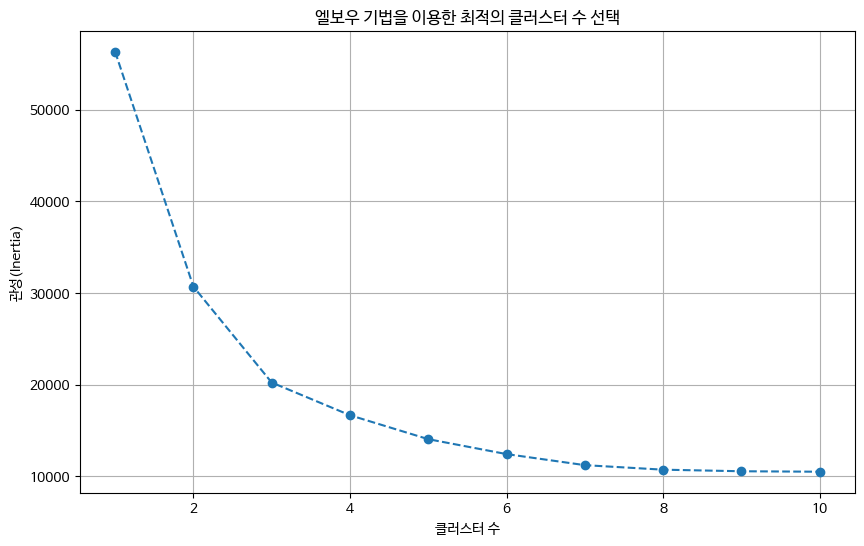

In [ ]:
from sklearn_extra.cluster import KMedoids

# 최적의 클러스터 수 찾기 (엘보우 기법)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(pca_df)
    inertia.append(kmedoids.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('엘보우 기법을 이용한 최적의 클러스터 수 선택')
plt.xlabel('클러스터 수')
plt.ylabel('관성(Inertia)')
plt.grid()
plt.show()

In [ ]:
# 클러스터 수 선택 (3개로 선택)
optimal_k = 3
kmedoids = KMedoids(n_clusters=3, random_state=42)
clusters = kmedoids.fit_predict(pca_df)
pca_df['KMedoids_Cluster'] = clusters

<ipython-input-128-fa518dae3637>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['KMedoids_Cluster'] = clusters


In [ ]:
# 실루엣 계수 계산 (n_cluster = 3)
silhouette_avg = silhouette_score(pca_df[col], pca_df['KMedoids_Cluster'])
print(f"전체 실루엣 계수 평균: {silhouette_avg:.6f}")

전체 실루엣 계수 평균: 0.583983


In [ ]:
pca_df

,PC1,PC2,PC3,KMeans_Cluster,KMedoids_Cluster
0,1065.180858,18.232432,-2.051716,2,0
1,1381.519613,-12.471714,-2.931350,2,0
2,753.617768,65.297896,-1.883747,2,0
3,671.525421,-68.035034,-3.856158,2,0
4,309.436687,24.605898,2.608097,2,0
...,...,...,...,...,...
245,-307.218733,9.196119,-0.241398,1,2
246,-314.705416,7.820327,0.786390,1,2
247,-341.336183,8.223714,-0.011461,1,2
248,-342.155528,11.277287,0.053830,1,2


In [ ]:
cluster_df = pca_df[['KMeans_Cluster', 'KMedoids_Cluster']]
cluster_df

,KMeans_Cluster,KMedoids_Cluster
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
245,1,2
246,1,2
247,1,2
248,1,2


In [ ]:
cluster_df = pd.concat([data_v3, cluster_df], axis=1)
cluster_df

,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,KMeans_Cluster,KMedoids_Cluster
0,31050,경기도,부천시,53.45,2227,791,1203,8.0,0.0,1.0,2,0
1,31240,경기도,화성시,698.18,2319,991,1450,10.0,0.0,2.0,2,0
2,31023,경기도,분당구,69.49,2093,580,969,5.0,1.0,0.0,2,0
3,31130,경기도,남양주시,458.14,1816,646,827,5.0,0.0,1.0,2,0
4,11230,서울특별시,강남구,39.50,1634,369,576,7.0,0.0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,32410,강원도,양양군,630.01,99,42,53,0.0,0.0,0.0,1,2
246,37330,경상북도,청송군,846.12,94,39,46,1.0,0.0,0.0,1,2
247,37340,경상북도,영양군,815.75,78,24,24,0.0,0.0,0.0,1,2
248,37310,경상북도,군위군,614.32,69,21,25,0.0,0.0,0.0,1,2


In [ ]:
cluster_df[cluster_df['KMeans_Cluster'] == 0].describe()

,중분류,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,KMeans_Cluster,KMedoids_Cluster
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.000000
mean,26076.554348,220.426337,745.750000,264.684783,379.750000,3.119565,0.032609,0.413043,0.0,0.782609
std,9298.468310,281.873653,168.146105,57.089467,83.556078,3.291155,0.178583,0.577074,0.0,0.414731
min,11020.000000,9.960000,416.000000,128.000000,242.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,21077.500000,28.772500,634.000000,221.250000,318.000000,1.000000,0.000000,0.000000,0.0,1.000000
50%,31021.500000,60.640000,717.000000,264.000000,370.000000,3.000000,0.000000,0.000000,0.0,1.000000
75%,33042.250000,393.020000,850.000000,303.250000,438.000000,4.000000,0.000000,1.000000,0.0,1.000000
max,38115.000000,1116.400000,1196.000000,396.000000,560.000000,22.000000,1.000000,2.000000,0.0,1.000000


In [ ]:
# 소아청소년수 / (달빛병원수+2차병원수+3차병원수) >> 병원 1개당 소아청소년 몇명을 봐야하는가
745.750000/(0.413043+ 3.119565+0.032609)

209.17380344590526

In [ ]:
cluster_df[cluster_df['KMeans_Cluster'] == 1].describe()

,중분류,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,KMeans_Cluster,KMedoids_Cluster
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000
mean,33623.076923,618.336667,243.837607,90.803419,108.170940,1.008547,0.008547,0.068376,1.0,1.846154
std,5147.962178,364.403672,128.616910,47.359454,62.169303,1.054512,0.092450,0.253476,0.0,0.362353
min,11010.000000,2.830000,51.000000,21.000000,24.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,32360.000000,416.600000,144.000000,50.000000,57.000000,0.000000,0.000000,0.000000,1.0,2.000000
50%,35310.000000,608.370000,193.000000,75.000000,95.000000,1.000000,0.000000,0.000000,1.0,2.000000
75%,37070.000000,821.100000,339.000000,124.000000,152.000000,1.000000,0.000000,0.000000,1.0,2.000000
max,39020.000000,1820.340000,559.000000,200.000000,250.000000,6.000000,1.000000,1.000000,1.0,2.000000


In [ ]:
# 소아청소년수 / (달빛병원수+2차병원수+3차병원수) >> 병원 1개당 소아청소년 몇명을 봐야하는가
243.837607/(0.068376+1.008547+0.008547)

224.63781311321358

In [ ]:
cluster_df[cluster_df['KMeans_Cluster'] == 2].describe()

,중분류,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,KMeans_Cluster,KMedoids_Cluster
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.0
mean,27662.853659,281.493415,1282.414634,482.390244,694.390244,6.292683,0.146341,1.073171,2.0,0.0
std,7354.000022,268.038999,333.651088,114.423310,177.119152,6.565988,0.357839,1.009709,0.0,0.0
min,11160.000000,24.550000,829.000000,318.000000,523.000000,0.000000,0.000000,0.000000,2.0,0.0
25%,23060.000000,53.450000,1093.000000,419.000000,590.000000,3.000000,0.000000,0.000000,2.0,0.0
50%,31023.000000,165.440000,1216.000000,465.000000,652.000000,5.000000,0.000000,1.000000,2.0,0.0
75%,31200.000000,463.440000,1367.000000,499.000000,727.000000,7.000000,0.000000,2.000000,2.0,0.0
max,39010.000000,978.700000,2319.000000,991.000000,1450.000000,32.000000,1.000000,4.000000,2.0,0.0


In [ ]:
# 소아청소년수 / (달빛병원수+2차병원수+3차병원수) >> 병원 1개당 소아청소년 몇명을 봐야하는가
1282.414634	/(1.073171+6.292683+0.146341)

170.7110417128416

In [ ]:
temp = cluster_df[cluster_df['KMeans_Cluster'] == 1]
temp = temp.reset_index()
temp

,index,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,KMeans_Cluster,KMedoids_Cluster
0,118,34070,충청남도,계룡시,60.70,559,184,207,0.0,0.0,0.0,1,1
1,123,21110,부산광역시,금정구,65.26,556,166,232,4.0,0.0,0.0,1,1
2,126,11010,서울특별시,종로구,23.91,521,154,250,4.0,1.0,0.0,1,1
3,129,35040,전라북도,정읍시,693.10,495,200,186,3.0,0.0,0.0,1,1
4,133,37020,경상북도,경주시,1324.86,500,171,217,3.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,245,32410,강원도,양양군,630.01,99,42,53,0.0,0.0,0.0,1,2
113,246,37330,경상북도,청송군,846.12,94,39,46,1.0,0.0,0.0,1,2
114,247,37340,경상북도,영양군,815.75,78,24,24,0.0,0.0,0.0,1,2
115,248,37310,경상북도,군위군,614.32,69,21,25,0.0,0.0,0.0,1,2


----

# 불균형 지표 정의

- 소아의료 수요지표 = 소아청소년수*0.5 + 출생아수* 0.3 + 가임연령부부수 * 0.2
- 소아의료 공급지표 = 달빛병원수 * 0.5 + 2차병원수 * 0.3 + 3차병원수 * 0.2
- 불균형 지표 = 소아의료 수요지표 / 소아의료 공급지표
- 불균형 지표가 클수록 수요대비 공급이 부족하다는 의미

In [ ]:
data_v3

,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
0,31050,경기도,부천시,53.45,2227,791,1203,8.0,0.0,1.0
1,31240,경기도,화성시,698.18,2319,991,1450,10.0,0.0,2.0
2,31023,경기도,분당구,69.49,2093,580,969,5.0,1.0,0.0
3,31130,경기도,남양주시,458.14,1816,646,827,5.0,0.0,1.0
4,11230,서울특별시,강남구,39.50,1634,369,576,7.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
245,32410,강원도,양양군,630.01,99,42,53,0.0,0.0,0.0
246,37330,경상북도,청송군,846.12,94,39,46,1.0,0.0,0.0
247,37340,경상북도,영양군,815.75,78,24,24,0.0,0.0,0.0
248,37310,경상북도,군위군,614.32,69,21,25,0.0,0.0,0.0


In [ ]:
df = data_v3.copy()
df

,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
0,31050,경기도,부천시,53.45,2227,791,1203,8.0,0.0,1.0
1,31240,경기도,화성시,698.18,2319,991,1450,10.0,0.0,2.0
2,31023,경기도,분당구,69.49,2093,580,969,5.0,1.0,0.0
3,31130,경기도,남양주시,458.14,1816,646,827,5.0,0.0,1.0
4,11230,서울특별시,강남구,39.50,1634,369,576,7.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
245,32410,강원도,양양군,630.01,99,42,53,0.0,0.0,0.0
246,37330,경상북도,청송군,846.12,94,39,46,1.0,0.0,0.0
247,37340,경상북도,영양군,815.75,78,24,24,0.0,0.0,0.0
248,37310,경상북도,군위군,614.32,69,21,25,0.0,0.0,0.0


# 스케일링
- StandardScaler 사용시 음수 범위의 값이 나오므로 MinMaxScaler 사용해서 스케일한 데이터 사용
- 의료 시설이 아무것도 없으면 분모가 0이 되어 데이터 값이 inf가 되므로 모든 데이터 값에 1을 더해줌 >> 함수 unbalance 첫출 df += 1 이 해당 코드부분

In [ ]:
df.columns

Index(['중분류', '행정구역시도명', '행정구역시군구명', '면적', '소아청소년수', '출생아수', '가임연령부부수',
       '2차병원수', '3차병원수', '달빛병원수'],
      dtype='object')

In [ ]:
col = ['소아청소년수', '출생아수', '가임연령부부수', '2차병원수', '3차병원수', '달빛병원수']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stan = pd.DataFrame(scaler.fit_transform(df[col]), columns = col)
stan

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
0,3.844657,3.680025,3.853092,1.386642,-0.204124,0.966595
1,4.061905,4.966773,4.912024,1.905207,-0.204124,2.476901
2,3.528230,2.322504,2.849892,0.608795,4.898979,-0.543710
3,2.874125,2.747132,2.241113,0.608795,-0.204124,0.966595
4,2.444352,0.964984,1.165032,1.127360,-0.204124,2.476901
...,...,...,...,...,...,...
245,-1.180384,-1.138850,-1.077162,-0.687617,-0.204124,-0.543710
246,-1.192191,-1.158151,-1.107172,-0.428335,-0.204124,-0.543710
247,-1.229973,-1.254657,-1.201490,-0.687617,-0.204124,-0.543710
248,-1.251226,-1.273959,-1.197203,-0.687617,-0.204124,-0.543710


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax = pd.DataFrame(scaler.fit_transform(df[col]), columns = col)
minmax

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
0,0.959436,0.793814,0.826788,0.25000,0.0,0.25
1,1.000000,1.000000,1.000000,0.31250,0.0,0.50
2,0.900353,0.576289,0.662693,0.15625,1.0,0.00
3,0.778219,0.644330,0.563114,0.15625,0.0,0.25
4,0.697972,0.358763,0.387097,0.21875,0.0,0.50
...,...,...,...,...,...,...
245,0.021164,0.021649,0.020337,0.00000,0.0,0.00
246,0.018959,0.018557,0.015428,0.03125,0.0,0.00
247,0.011905,0.003093,0.000000,0.00000,0.0,0.00
248,0.007937,0.000000,0.000701,0.00000,0.0,0.00


불균형 지표 구하는 함수 정의
- df : 기준 DataFrame 넣기 >> minmax 넣으면 됨(MinmaxScaler로 스케일된 데이터 사용하기로 결정했기 때문)

In [ ]:
def unbalance(df):
    df += 1
    df['소아청소년수_가중치'] = np.dot(df['소아청소년수'], 0.6826)
    df['출생아수_가중치'] = np.dot(df['출생아수'], 0.1957)
    df['가임연령부부수_가중치'] = np.dot(df['가임연령부부수'], 0.1217)

    df['달빛병원수_가중치'] = np.dot(df['달빛병원수'], 0.6826)
    df['2차병원수_가중치'] = np.dot(df['2차병원수'], 0.1957)
    df['3차병원수_가중치'] = np.dot(df['3차병원수'], 0.1217)

    df['불균형지표'] = (df['소아청소년수_가중치'] + df['출생아수_가중치'] + df['가임연령부부수_가중치']) / (df['달빛병원수_가중치'] + df['2차병원수_가중치'] + df['3차병원수_가중치'])
    return df

In [ ]:
unbalance(stan)

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,소아청소년수_가중치,출생아수_가중치,가임연령부부수_가중치,달빛병원수_가중치,2차병원수_가중치,3차병원수_가중치,불균형지표
0,4.844657,4.680025,4.853092,2.386642,0.795876,1.966595,3.306963,0.915881,0.590621,1.342398,0.467066,0.096858,2.525001
1,5.061905,5.966773,5.912024,2.905207,0.795876,3.476901,3.455256,1.167698,0.719493,2.373332,0.568549,0.096858,1.758113
2,4.528230,3.322504,3.849892,1.608795,5.898979,0.456290,3.090970,0.650214,0.468532,0.311464,0.314841,0.717906,3.131738
3,3.874125,3.747132,3.241113,1.608795,0.795876,1.966595,2.644478,0.733314,0.394443,1.342398,0.314841,0.096858,2.150528
4,3.444352,1.964984,2.165032,2.127360,0.795876,3.476901,2.351115,0.384547,0.263484,2.373332,0.416324,0.096858,1.039020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.180384,-0.138850,-0.077162,0.312383,0.795876,0.456290,-0.123130,-0.027173,-0.009391,0.311464,0.061133,0.096858,-0.340168
246,-0.192191,-0.158151,-0.107172,0.571665,0.795876,0.456290,-0.131190,-0.030950,-0.013043,0.311464,0.111875,0.096858,-0.336762
247,-0.229973,-0.254657,-0.201490,0.312383,0.795876,0.456290,-0.156980,-0.049836,-0.024521,0.311464,0.061133,0.096858,-0.492779
248,-0.251226,-0.273959,-0.197203,0.312383,0.795876,0.456290,-0.171487,-0.053614,-0.024000,0.311464,0.061133,0.096858,-0.530615


In [ ]:
temp = unbalance(minmax)
temp.sort_values('불균형지표', ascending=False)[:10]

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,소아청소년수_가중치,출생아수_가중치,가임연령부부수_가중치,달빛병원수_가중치,2차병원수_가중치,3차병원수_가중치,불균형지표
2,1.900353,1.576289,1.662693,1.15625,2.0,1.00,1.297181,0.308480,0.202350,0.68260,0.226278,0.2434,1.569074
0,1.959436,1.793814,1.826788,1.25000,1.0,1.25,1.337511,0.351049,0.222320,0.85325,0.244625,0.1217,1.566841
7,1.600088,1.441237,1.456522,1.03125,1.0,1.00,1.092220,0.282050,0.177259,0.68260,0.201816,0.1217,1.542098
16,1.560847,1.538144,1.539271,1.09375,1.0,1.00,1.065434,0.301015,0.187329,0.68260,0.214047,0.1217,1.525785
11,1.578924,1.504124,1.546985,1.12500,1.0,1.00,1.077774,0.294357,0.188268,0.68260,0.220163,0.1217,1.523139
5,1.600088,1.463918,1.437588,1.31250,1.0,1.00,1.092220,0.286489,0.174954,0.68260,0.256856,0.1217,1.464123
28,1.490741,1.414433,1.373072,1.00000,1.0,1.00,1.017580,0.276805,0.167103,0.68260,0.195700,0.1217,1.461487
3,1.778219,1.644330,1.563114,1.15625,1.0,1.25,1.213812,0.321795,0.190231,0.85325,0.226278,0.1217,1.436728
1,2.000000,2.000000,2.000000,1.31250,1.0,1.50,1.365200,0.391400,0.243400,1.02390,0.256856,0.1217,1.426069
38,1.453704,1.480412,1.449509,1.15625,1.0,1.00,0.992298,0.289717,0.176405,0.68260,0.226278,0.1217,1.415148


불균형 지표 상위 10곳 확인

In [ ]:
temp_res = temp.sort_values('불균형지표', ascending=False)[:10]
temp_res.index

Index([2, 0, 7, 16, 11, 5, 28, 3, 1, 38], dtype='int64')

In [ ]:
col = [0, 2, 1, 7, 16, 11, 3, 5, 28, 38]
data_v3.iloc[col]

,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수
0,31050,경기도,부천시,53.45,2227,791,1203,8.0,0.0,1.0
2,31023,경기도,분당구,69.49,2093,580,969,5.0,1.0,0.0
1,31240,경기도,화성시,698.18,2319,991,1450,10.0,0.0,2.0
7,31193,경기도,수지구,42.10,1412,449,675,1.0,0.0,0.0
16,31150,경기도,시흥시,139.68,1323,543,793,3.0,0.0,0.0
11,23060,인천광역시,부평구,32.00,1364,510,804,4.0,0.0,0.0
3,31130,경기도,남양주시,458.14,1816,646,827,5.0,0.0,1.0
5,22070,대구광역시,달서구,62.34,1412,471,648,10.0,0.0,0.0
28,24040,광주광역시,북구,734.72,1164,423,556,0.0,0.0,0.0
38,37050,경상북도,구미시,615.35,1080,487,665,5.0,0.0,0.0


----

# v4 데이터로 상위 10곳 선정 (최종 데이터)

In [ ]:
path = '/content/drive/MyDrive/mulcam_bigdata/2024통계데이터공모전/기획_데이터수집/성원님/temp/시군구코드별_변수_v4.csv'
data_v4 = pd.read_csv(path)

In [ ]:
df2 = data_v4.copy()

In [ ]:
df2

,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,1차병원수
0,31050,경기도,부천시,53.45,2227,791,1203,8.0,0.0,1.0,42.0
1,31240,경기도,화성시,698.18,2319,991,1450,10.0,0.0,2.0,62.0
2,31023,경기도,분당구,69.49,2093,580,969,5.0,1.0,0.0,0.0
3,31130,경기도,남양주시,458.14,1816,646,827,5.0,0.0,1.0,46.0
4,11230,서울특별시,강남구,39.50,1634,369,576,7.0,0.0,2.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
245,32410,강원도,양양군,630.01,99,42,53,0.0,0.0,0.0,0.0
246,37330,경상북도,청송군,846.12,94,39,46,1.0,0.0,0.0,0.0
247,37340,경상북도,영양군,815.75,78,24,24,0.0,0.0,0.0,0.0
248,37310,경상북도,군위군,614.32,69,21,25,0.0,0.0,0.0,0.0


In [ ]:
condition = df2['달빛병원수'] == 0
df2_zero = df2[condition]

In [ ]:
col2 = ['소아청소년수', '출생아수', '가임연령부부수', '2차병원수', '3차병원수', '1차병원수']

In [ ]:
df2_zero = df2_zero[col2]
df2_zero

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,1차병원수
2,2093,580,969,5.0,1.0,0.0
5,1412,471,648,10.0,0.0,30.0
7,1412,449,675,1.0,0.0,0.0
9,1417,492,670,32.0,1.0,21.0
11,1364,510,804,4.0,0.0,26.0
...,...,...,...,...,...,...
245,99,42,53,0.0,0.0,0.0
246,94,39,46,1.0,0.0,0.0
247,78,24,24,0.0,0.0,0.0
248,69,21,25,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax = pd.DataFrame(scaler.fit_transform(df2_zero), columns = col2)
minmax

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,1차병원수
0,1.000000,1.000000,1.000000,0.15625,1.0,0.000000
1,0.666503,0.805009,0.660317,0.31250,0.0,0.769231
2,0.666503,0.765653,0.688889,0.03125,0.0,0.000000
3,0.668952,0.842576,0.683598,1.00000,1.0,0.538462
4,0.642997,0.874776,0.825397,0.12500,0.0,0.666667
...,...,...,...,...,...,...
176,0.023506,0.037567,0.030688,0.00000,0.0,0.000000
177,0.021058,0.032200,0.023280,0.03125,0.0,0.000000
178,0.013222,0.005367,0.000000,0.00000,0.0,0.000000
179,0.008815,0.000000,0.001058,0.00000,0.0,0.000000


In [ ]:
def unbalance2(df):
    df += 1
    df['소아청소년수_가중치'] = np.dot(df['소아청소년수'], 0.6826)
    df['출생아수_가중치'] = np.dot(df['출생아수'], 0.1957)
    df['가임연령부부수_가중치'] = np.dot(df['가임연령부부수'], 0.1217)

    df['1차병원수_가중치'] = np.dot(df['1차병원수'], 0.6826)
    df['2차병원수_가중치'] = np.dot(df['2차병원수'], 0.1957)
    df['3차병원수_가중치'] = np.dot(df['3차병원수'], 0.1217)

    df['불균형지표'] = (df['소아청소년수_가중치'] + df['출생아수_가중치'] + df['가임연령부부수_가중치']) / (df['1차병원수_가중치'] + df['2차병원수_가중치'] + df['3차병원수_가중치'])
    return df

In [ ]:
temp2 = unbalance2(minmax)
temp2.sort_values('불균형지표', ascending=False)[:10]

,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,1차병원수,소아청소년수_가중치,출생아수_가중치,가임연령부부수_가중치,1차병원수_가중치,2차병원수_가중치,3차병원수_가중치,불균형지표
0,2.000000,2.000000,2.000000,1.15625,2.0,1.0,1.365200,0.391400,0.243400,0.6826,0.226278,0.2434,1.735692
2,1.666503,1.765653,1.688889,1.03125,1.0,1.0,1.137555,0.345538,0.205538,0.6826,0.201816,0.1217,1.678367
11,1.461802,1.502683,1.519577,1.06250,1.0,1.0,0.997826,0.294075,0.184932,0.6826,0.207931,0.1217,1.458989
14,1.455436,1.613596,1.547090,1.15625,1.0,1.0,0.993481,0.315781,0.188281,0.6826,0.226278,0.1217,1.453109
21,1.412831,1.604651,1.492063,1.15625,1.0,1.0,0.964398,0.314030,0.181584,0.6826,0.226278,0.1217,1.416693
22,1.392752,1.536673,1.417989,1.09375,1.0,1.0,0.950693,0.300727,0.172569,0.6826,0.214047,0.1217,1.398334
25,1.379530,1.627907,1.451852,1.15625,1.0,1.0,0.941667,0.318581,0.176690,0.6826,0.226278,0.1217,1.394304
17,1.428012,1.470483,1.426455,1.18750,1.0,1.0,0.974761,0.287774,0.173600,0.6826,0.232394,0.1217,1.385302
37,1.336925,1.484794,1.378836,1.00000,1.0,1.0,0.912585,0.290574,0.167804,0.6826,0.195700,0.1217,1.370963
33,1.353085,1.457961,1.414815,1.09375,1.0,1.0,0.923616,0.285323,0.172183,0.6826,0.214047,0.1217,1.356239


In [ ]:
temp2_res = temp2.sort_values('불균형지표', ascending=False)[:10]
temp2_res.index

Index([0, 2, 11, 14, 21, 22, 25, 17, 37, 33], dtype='int64')

In [ ]:
col2= [2, 6, 8, 4, 23, 19, 16, 9, 41, 11]
df2[condition].iloc[col2]

,중분류,행정구역시도명,행정구역시군구명,면적,소아청소년수,출생아수,가임연령부부수,2차병원수,3차병원수,달빛병원수,1차병원수
7,31193,경기도,수지구,42.10,1412,449,675,1.0,0.0,0.0,0.0
16,31150,경기도,시흥시,139.68,1323,543,793,3.0,0.0,0.0,39.0
28,24040,광주광역시,북구,734.72,1164,423,556,0.0,0.0,0.0,12.0
11,23060,인천광역시,부평구,32.00,1364,510,804,4.0,0.0,0.0,26.0
60,26040,울산광역시,북구,734.72,918,442,574,0.0,0.0,0.0,9.0
54,31250,경기도,광주시,430.99,966,436,607,1.0,0.0,0.0,20.0
46,24020,광주광역시,서구,47.76,953,320,409,0.0,0.0,0.0,10.0
38,37050,경상북도,구미시,615.35,1080,487,665,5.0,0.0,0.0,23.0
85,31180,경기도,하남시,92.99,795,341,515,0.0,0.0,0.0,32.0
41,31042,경기도,동안구,21.93,994,302,515,2.0,0.0,0.0,0.0
